In [168]:

"""
Run regressions that strip predictable components of consumption and income
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys; sys.path.append('/home/mitch/school/data/mexico_enigh/src/')

import utils
import os

import statsmodels.stats.weightstats as ws

plotdir = '/home/mitch/school/data/mexico_enigh/fig/'

processed = '/home/mitch/Dropbox/data/mexico_enigh/processed/'
spec = '/home/mitch/Dropbox/data/mexico_enigh/spec/1994'

In [169]:
os.chdir(spec)
#income = pd.read_csv('capital_income.csv')
expenditures = pd.read_csv('capital_expenditures.csv')

In [170]:
expenditures

,hhid,expense_credit_card_payments,expense_debt_to_work_or_person,expense_deposits_savings,expense_foreigncurrencies_perciousmetals_art,expense_hhbusiness_machinery_animal_equipment,expense_hhbusiness_negative_balance,expense_inheritance_dowrie_legacies,expense_life_insurance,expense_loans_to_third_parties,expense_other,expense_realestate_hh_inhabit,expense_realestate_hh_not_inhabit,expense_realestate_mortgage,expense_securities_shares_bond,expense_trademarks_patents_copyrights
0,19940110040,0.0,540.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19940110060,0.0,0.0,1170.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19940110070,600.0,0.0,2400.0,0.0,0.0,0.0,0.0,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19940110090,300.0,0.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19940110100,0.0,0.0,1450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5441,19943290150,0.0,0.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5442,19943290190,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300.0,0.0,0.0,0.0
5443,19943290210,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5444,19943298090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
expenditures.columns

Index(['hhid', 'expense_credit_card_payments',
       'expense_debt_to_work_or_person', 'expense_deposits_savings',
       'expense_foreigncurrencies_perciousmetals_art',
       'expense_hhbusiness_machinery_animal_equipment',
       'expense_hhbusiness_negative_balance',
       'expense_inheritance_dowrie_legacies', 'expense_life_insurance',
       'expense_loans_to_third_parties', 'expense_other',
       'expense_realestate_hh_inhabit', 'expense_realestate_hh_not_inhabit',
       'expense_realestate_mortgage', 'expense_securities_shares_bond',
       'expense_trademarks_patents_copyrights'],
      dtype='object')

In [172]:
os.chdir(processed)
df = pd.read_csv('data.csv').query('Y==1994')
df

/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (92,101) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,hhid,location,weight,location_size,ingmon,permon,gasnom,eronom,ingcor,gasmon,...,presta2_08,presta2_09,presta2_10,presta2_11,presta2_12,presta2_13,presta2_14,presta2_15,presta2_16,presta2_17
10165,19940110010,1001,169,1,6480.0,0.0,920.31,1680.0,7400.31,5062.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10166,19940110020,1001,169,1,2763.0,0.0,148.39,0.0,2911.39,2569.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10167,19940110030,1001,169,1,2760.0,0.0,593.54,0.0,3353.54,2002.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10168,19940110040,1001,169,1,6600.0,0.0,1533.85,0.0,8133.85,4925.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10169,19940110050,1001,169,1,8280.0,0.0,1780.62,0.0,10060.62,5128.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22666,19943290240,32051,1004,4,3411.0,0.0,519.14,0.0,3930.14,2901.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22667,19943290250,32051,1004,4,1542.0,0.0,1383.05,0.0,2925.05,1319.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22668,19943298090,32051,1004,4,1800.0,0.0,1051.43,0.0,2851.43,1335.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22669,19943298100,32051,1004,4,5500.0,0.0,962.94,0.0,6462.94,2676.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
df = (df.merge(expenditures, on='hhid', how='inner'))
df

,hhid,location,weight,location_size,ingmon,permon,gasnom,eronom,ingcor,gasmon,...,expense_hhbusiness_negative_balance,expense_inheritance_dowrie_legacies,expense_life_insurance,expense_loans_to_third_parties,expense_other,expense_realestate_hh_inhabit,expense_realestate_hh_not_inhabit,expense_realestate_mortgage,expense_securities_shares_bond,expense_trademarks_patents_copyrights
0,19940110040,1001,169,1,6600.0,0.0,1533.85,0.0,8133.85,4925.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19940110060,1001,153,1,7560.0,200.0,1305.79,0.0,8865.79,4109.89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19940110070,1001,153,1,13000.0,500.0,3185.04,0.0,16185.04,11161.73,...,0.0,0.0,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19940110090,1001,153,1,5700.0,950.0,1746.76,0.0,7446.76,4774.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19940110100,1001,153,1,6010.0,5400.0,1449.92,85.0,7459.92,9283.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5319,19943290120,32022,892,3,1900.0,1250.0,920.01,0.0,2820.01,3541.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5320,19943290190,32051,1004,4,4281.0,0.0,795.13,0.0,5076.13,1763.31,...,0.0,0.0,0.0,0.0,0.0,0.0,1300.0,0.0,0.0,0.0
5321,19943290210,32051,1004,4,900.0,0.0,245.34,0.0,1145.34,680.71,...,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5322,19943298090,32051,1004,4,1800.0,0.0,1051.43,0.0,2851.43,1335.24,...,0.0,0.0,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
df

,hhid,location,weight,location_size,ingmon,permon,gasnom,eronom,ingcor,gasmon,...,expense_hhbusiness_negative_balance,expense_inheritance_dowrie_legacies,expense_life_insurance,expense_loans_to_third_parties,expense_other,expense_realestate_hh_inhabit,expense_realestate_hh_not_inhabit,expense_realestate_mortgage,expense_securities_shares_bond,expense_trademarks_patents_copyrights
0,19940110040,1001,169,1,6600.0,0.0,1533.85,0.0,8133.85,4925.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19940110060,1001,153,1,7560.0,200.0,1305.79,0.0,8865.79,4109.89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19940110070,1001,153,1,13000.0,500.0,3185.04,0.0,16185.04,11161.73,...,0.0,0.0,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19940110090,1001,153,1,5700.0,950.0,1746.76,0.0,7446.76,4774.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19940110100,1001,153,1,6010.0,5400.0,1449.92,85.0,7459.92,9283.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5319,19943290120,32022,892,3,1900.0,1250.0,920.01,0.0,2820.01,3541.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5320,19943290190,32051,1004,4,4281.0,0.0,795.13,0.0,5076.13,1763.31,...,0.0,0.0,0.0,0.0,0.0,0.0,1300.0,0.0,0.0,0.0
5321,19943290210,32051,1004,4,900.0,0.0,245.34,0.0,1145.34,680.71,...,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5322,19943298090,32051,1004,4,1800.0,0.0,1051.43,0.0,2851.43,1335.24,...,0.0,0.0,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
income = ['salary_income', 'business_income', 'transfers_income']
df['income'] = df[income].sum(axis=1)
df['log_income'] = np.log(df['income'])

consumption = ['consumption_food', 'consumption_personal']
#consumption = ['consumption_food', 'consumption_clothing', 'consumption_personal', 'consumption_education']
df['consumption'] = df[consumption].sum(axis=1)
df['log_consumption'] = np.log(df['consumption'])

/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [176]:
len(df)

5324

In [177]:
df = (df.query('relationship_to_hhm == 1')); print(len(df))
df = df.query('income > 0'); print(len(df))
df = df.query('age >= 20'); print(len(df))
df = df.query('age <= 60'); print(len(df))
#df = df[df['location_size'].apply(lambda x : x not in [4.0, 5.0])]; print(len(df))

5324
5291
5262
4412


In [178]:
consumption_to_income = ws.DescrStatsW(df['consumption'] / df['income'], weights=df['weight'])
consumption_to_income_005 = consumption_to_income.quantile(0.005)
consumption_to_income_995 = consumption_to_income.quantile(0.995)
df = df[df['consumption'] / df['income'] > consumption_to_income_005.values[0]]
df = df[df['consumption'] / df['income'] < consumption_to_income_995.values[0]]

#df['log_income'] = utils.residualize_income_singleyear(df)
df['income']     = df['log_income'].apply(np.exp)

In [187]:
df['alt_expense_deposits_savings'] = (df['expense_deposits_savings'] > 0.00 * df['income']) + 0
df['alt_expense_credit_card_payments'] = (df['expense_credit_card_payments'] > 0.00 * df['income']) + 0
alt_expense_deposits_savings = utils.indicator_by_decile(df, 'log_income', 'alt_expense_deposits_savings', 'weight')
alt_expense_credit_card_payments = utils.indicator_by_decile(df, 'log_income', 'alt_expense_credit_card_payments', 'weight')


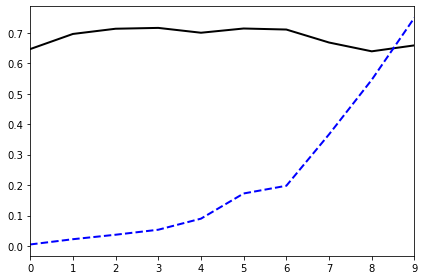

In [188]:
plt.clf()
plt.plot(alt_expense_deposits_savings)
plt.plot(alt_expense_credit_card_payments)
plt.show()

In [181]:
np.mean(df['expense_deposits_savings'] > 0.5 * df['income'])

0.057201929703652656